# Limpieza de bienes raíces

Este es un conjunto de datos (dataset) reales que fue descargado usando técnicas de web scraping. La data contiene registros de fotocasa, el cual es uno de los sitios mas populares de bienes raíces en España. Por favor no hagas estos (web scraping) a no ser que sea para propósitos académicos.

El dataset fue descargado hace algunos años por Henry Navarro y en ningún caso se obtuvo beneficio económico de ello.

Contiene miles de datos de casas reales publicadas en la web www.fotocasa.com. Tu objetivo es extraer tanta información como sea posible con el conocimiento que tienes hasta ahora de ciencia de datos, por ejemplo ¿cuál es la casa mas cara en todo el dataset?

Empecemos precisamente con esa pregunta... ¡Buena suerte!

Let's start with precisely that question... Good luck!

#### Ejercicio 00. Lee el dataset assets/real_estate.csv e intenta visualizar la tabla (★☆☆)

In [129]:
import pandas as pd

# this CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')
# Se muestran todas las columnas
pd.set_option('display.max_columns', None )
# Se imprimen las tres primeras filas del dataset para ver su estructura
ds.head(3)


,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,description,address,country,level1,level2,level3,level4,level5,level6,level7,level8,upperLevel,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,2019-12-28T18:27:15.9975027Z,Ponemos a la venta piso de 3 dormitorios con t...,"Calle Presidente Felipe Gonzalez, Arganda del Rey",España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,"Arganda del Rey, Zona de",Arganda del Rey,NaN,Perlita,NaN,Perlita,0,0,0,0,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,2019-12-28T18:27:15.9975027Z,"""""Agencia inmobiliaria de FUENLABRADA - zona F...","Calle Polvoranca, 6, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,2019-12-28T18:27:15.9975027Z,"Lookandfind Boadilla, vende en exclusiva, piso...","Calle Reyes Católicos, Boadilla del Monte",España,Madrid,Madrid,Zona Noroeste,"Boadilla del Monte, Zona de",Boadilla del Monte,NaN,Sector B,NaN,Sector B,0,0,0,0,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN


#### Ejercicio 01. ¿Cuál es la casa mas cara en el todo el dataset? (★☆☆)

Imprime la direccion y el precio de la casa seleccionada. Por ejemplo:

`The house with address General Street Nº5 is the most expensive and its price is 5000000 USD`

In [128]:
# Se halla el indice con el valor máximo de la columna 'price'
id_propiedad_mas_cara = ds['price'].idxmax()
# Se localiza el valor de las columnas 'price' y 'address' con el indice máximo
precio_max = ds.loc[id_propiedad_mas_cara, 'price']
direccion = ds.loc[id_propiedad_mas_cara, 'address']
# Se muestra el resultado
print(f'La casa mas cara esta {direccion} con un precio de {precio_max}')

La casa mas cara esta El Escorial con un precio de 8500000


#### Ejercicio 02. ¿Cuál es la casa mas barata del dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`The house with address Concrete Street Nº1 is the cheapest and its price is 12000 USD`

In [127]:
# Filtro precios iguales a 0 euros 
ds_filtrado = ds[ds['price'] > 0] 
# Se halla el indice con el valor mínimo de la columna 'price'
id_propiedad_mas_barata = ds_filtrado['price'].idxmin()
# Se localiza el valor de las columnas 'price' y 'address' con el indice minimo
precio_min = ds_filtrado.loc[id_propiedad_mas_barata, 'price']
direccion = ds_filtrado.loc[id_propiedad_mas_barata, 'address']
# Se muestra el resultado
print(f'''Se han filtrado las propiedades con valor de venta de 0 euros ya que debe tratarse de un error en los datos:
La casa mas barata esta {direccion}, con un precio de {precio_min} euros. ''')

Se han filtrado las propiedades con valor de venta de 0 euros ya que debe tratarse de un error en los datos:
La casa mas barata esta Berlin, Coslada, con un precio de 600 euros. 


#### Ejercicio 03. ¿Cuál es la casa mas grande y la mas pequeña del dataset? (★☆☆)

Imprime la dirección y el area de las casas seleccionadas. Por ejemplo:

`The bigger house is located on Yukka Street Nº10 and its surface is 5000 meters`

`The smaller house is located on County Road 1 N and its surface is 200 meters`

In [124]:
# se localiza el index de la propiedad con mayor superficie y se llama al dato de superficie por su columna
biggest_property = ds_filtrado.loc[ds_filtrado['surface'].idxmax(), 'surface']
# se localiza el index de la propiedad con mayor superficie y se llama al dato de dirección por su columna
biggest_property_adress = ds_filtrado.loc[ds_filtrado['surface'].idxmax(), 'address']
# se localiza el index de la propiedad con menor superficie y se llama al dato de superficie por su columna
smallest_property = ds_filtrado.loc[ds_filtrado['surface'].idxmin(), 'surface']
# se localiza el index de la propiedad con mayor superficie y se llama al dato de dirección por su columna
smallest_property_adress = ds_filtrado.loc[ds_filtrado['surface'].idxmin(), 'address']

#Print del resultado
print(f'La propiedad mas grande esta en {biggest_property_adress}, con una superficie de {biggest_property} m²')
print(f'La propiedad mas pequeña esta en {smallest_property_adress}, con una superficie de {smallest_property} m²')

La propiedad mas grande esta en Sevilla la Nueva, con una superficie de 249000.0 m²
La propiedad mas pequeña esta en Calle Amparo,  Madrid Capital, con una superficie de 15.0 m²


#### Ejercicio 04. ¿Cuantas poblaciones (columna level5) contiene el dataset? (★☆☆)

Imprime el nombre de las poblaciones separadas por coma. Por ejemplo:

`> print(populations)`

`population1, population2, population3,...`

In [121]:
# Numero de poblaciones unicas
poblaciones = ds_filtrado['level5'].nunique()
# string de todas las poblaciones unicas separadas por comas
poblaciones_sincomillas = ', '.join(ds_filtrado['level5'].unique())
# Se muestra el resultado
print(f'En la base de datos hay {poblaciones} poblaciones')
print(poblaciones_sincomillas)


En la base de datos hay 168 poblaciones
Arganda del Rey, Fuenlabrada, Boadilla del Monte, Las Rozas de Madrid,  Madrid Capital, Villaviciosa de Odón, Pinto, Valdemoro, Navalcarnero, Pozuelo de Alarcón, Torrejón de Ardoz, Navalagamella, San Sebastián de los Reyes, Rivas-vaciamadrid, Alpedrete, Móstoles, San Fernando de Henares, Coslada, Becerril de la Sierra, Alcalá de Henares, Chinchón, Parla, Alcorcón, El Escorial, Leganés, Pedrezuela, Majadahonda, Villanueva de la Cañada, Villanueva del Pardillo, Torrelodones, Moralzarzal, Mejorada del Campo, Aranjuez, Corpa, Getafe, Velilla de San Antonio, Sevilla la Nueva, San Martín de la Vega, Villalbilla, Collado Villalba, Alcobendas, El Molar (Madrid), Moraleja de Enmedio, Algete, Campo Real, Torrejón de la Calzada, Colmenar Viejo, Valdemorillo, Fuente El Saz de Jarama, Tres Cantos, Arroyomolinos (Madrid), Griñón, Paracuellos de Jarama, Guadarrama, Titulcia, Galapagar, Collado Mediano, Los Molinos, San Lorenzo de El Escorial, Loeches, San Martí

#### Ejercicio 05. ¿El data set contiene valores no admitidos (NAs)? (★☆☆)

Imprima un booleano (`true` o `fase`) seguido de la fila/columna que contiene el NAs.

In [113]:
# Averiguamos si hay NaN en el dataset
hay_nans = ds_filtrado.isna().any()
# Resultado // iteramos sobre la serie 'hay_nans' para mostrar los valores en el orden que solicita el enunciado
print('Si, el dataset contiene valores no admitidos')
for indice in hay_nans.index:
    print(f' {hay_nans[indice]}: {indice}')


Si, el dataset contiene valores no admitidos
 False: Unnamed: 0
 False: id_realEstates
 False: isNew
 True: realEstate_name
 True: phone_realEstate
 False: url_inmueble
 True: rooms
 True: bathrooms
 True: surface
 False: price
 False: date
 True: description
 False: address
 False: country
 False: level1
 False: level2
 False: level3
 True: level4
 False: level5
 True: level6
 True: level7
 True: level8
 False: upperLevel
 False: countryId
 False: level1Id
 False: level2Id
 False: level3Id
 False: level4Id
 False: level5Id
 False: level6Id
 False: level7Id
 False: level8Id
 False: accuracy
 False: latitude
 False: longitude
 True: zipCode
 True: customZone
 True: PPS


pandas.core.series.Series

#### Ejercicio 06. Elimina los NAs del data set, si aplica (★★☆)

Imprima una comparación entre las dimensiones del DataFrame original versus el DataFrame después de las eliminaciones.


In [135]:
ds_filtrado.isna().sum()
#Buscamos NaN por filas
ds_nan_droped_1 = ds_filtrado.dropna()
#Buscamos NaN por columnas
ds_nan_droped_2 = ds_filtrado.dropna(axis=1)
#Total de Nan en el dataframe
total_NaN = ds_filtrado.isna().sum().sum()
# Mostramos resultado
print(f'''las dimensiones originales del dataframe son {ds_filtrado.shape}:
- Se reducen a (15275, 25) si eliminamos los Nan por columnas
- Si eliminamos los NaN por filas, se queda sin datos (0, 38)
- Siendo {total_NaN} el total de NaN encontrados, no procede su eliminación sin valorar antes con mas detalle 
otras opciones como completarlos con medias de sus vecinos.''')



las dimensiones originales del dataframe son (15275, 38):
- Se reducen a (15275, 25) si eliminamos los Nan por columnas
- Si eliminamos los NaN por filas, se queda sin datos (0, 38)
- Siendo 66667 el total de NaN encontrados, no procede su eliminación sin valorar antes con mas detalle 
otras opciones como completarlos con medias de sus vecinos.


#### Ejercicio 07. ¿Cuál la media de precios en la población (columna level5) de "Arroyomolinos (Madrid)"? (★★☆)

Imprima el valor obtenido

In [137]:
# Se obtiene precio medio en la poblacion solicitada filtrando dataset original por columna 'level5'
precio_medio_arroyomolinos = ds_filtrado[ds_filtrado['level5'] == 'Arroyomolinos (Madrid)']['price'].mean()
# Se muestra el resultado
print(f'El precio medio de las propiedades en Arroyomolinos es de {precio_medio_arroyomolinos: .2f} euros')

El precio medio de las propiedades en Arroyomolinos es de  298905.18 euros


#### Ejercicio 08. Trazar el histograma de los precios para la población (level5 column) de "Arroyomolinos (Madrid)" y explica qué observas (★★☆)

Imprime el histograma de los precios y escribe en la celda del Markdown un breve análisis del trazado.


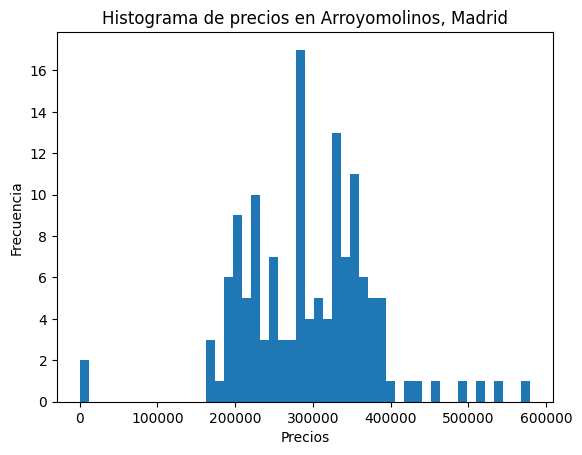

In [82]:
# Importacion de Modulos necesarios
import matplotlib.pyplot as plt

# Se grafica el histograma
plt.hist(ds[ds['level5'] == 'Arroyomolinos (Madrid)']['price'], bins=50)
# Titulo y etiquetas
plt.title('Histograma de precios en Arroyomolinos, Madrid')
plt.xlabel('Precios')
plt.ylabel('Frecuencia')
plt.show()

### Observaciones:

-Se observan valores atipicos en el rango bajo(Viviendas en venta por 0 euros) que muy probablemente se deban a errores en los datos introducidos.


-La mayor cantidad de propiedades en venta se encuentra en el rango entre 150.000 y 400.000 euros.  


-Dentro de ese rango, se observa que el precio mas frecuente esta entre 275.000 y 300.000 euros (mas de 12 viviendas)


-El histograma tiene una distribucion asimetrica. Pueden encontrarse viviendas por encima de los 400.000 euros hasta casi los 600.000, pero ninguna por debajo de los 150.000 euros.

**TODO: Markdown**. Para escribir aquí, has doble click en este celda y elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 09. ¿ Son los precios promedios de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedio y escribe una conclusion acerca de ellos

In [79]:
# Se obtienen precios medios de las dos poblaciones solicitadas redondeados a dos decimales
precio_medio_Valdemorillo = round(ds_filtrado[ds_filtrado['level5'] == 'Valdemorillo']['price'].mean(), 2)
precio_medio_Galapagar = round(ds_filtrado[ds_filtrado['level5'] == 'Galapagar']['price'].mean(), 2)

# Se muestra el resultado
print(f'El precio medio de las propiedades en Valdemorillo es de {precio_medio_Valdemorillo} y el de Galapagar es de {precio_medio_Galapagar}')

El precio medio de las propiedades en Valdemorillo es de 363860.29 y el de Galapagar es de 360063.2


#### Ejercicio 10. ¿Son los promedios de precio por metro cuadrado (price/m2) de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios de precio y escribe una conclusion acerca de ellos.

Pista: Crea una nueva columna llamada `pps` (price per square) y luego analiza los valore.s

In [74]:
# Se crea nueva columna de precio por metro cuadrado
ds['PPS'] = ds_filtrado['price'] / ds_filtrado['surface']

In [78]:

# Se obtienen las medias de precio por metro cuadrado de las poblaciones solicitadas
PPS_medio_Valdemorillo = round(ds_filtrado[ds_filtrado['level5'] == 'Valdemorillo']['PPS'].mean(), 2)
PPS_medio_Galapagar = round(ds_filtrado[ds_filtrado['level5'] == 'Galapagar']['PPS'].mean(), 2)
print(f'El precio medio por metro cuadrado de las propiedades en Valdemorillo es de {PPS_medio_Valdemorillo} y el de Galapagar es de {PPS_medio_Galapagar}')

# Obtengo la superficie media de las propiedades de cada comunidad redondeada a dos decimales
surface_media_Valdemorillo = round(ds_filtrado[ds_filtrado['level5'] == 'Valdemorillo']['surface'].mean(), 2)
surface_media_Galapagar = round(ds_filtrado[ds_filtrado['level5'] == 'Galapagar']['surface'].mean(), 2)

# Se muestra el resultado
print(f'''Promedio de precio por metro cuadrado:
- {PPS_medio_Valdemorillo:.2f} euros/m² en Valdemorillo, con una superficie promedio de {surface_media_Valdemorillo} m²
- {PPS_medio_Galapagar:.2f} euros/m² en Galapagar, con una superficie promedio de {surface_media_Galapagar} m²''')


El precio medio por metro cuadrado de las propiedades en Valdemorillo es de 1317.95 y el de Galapagar es de 1606.32
Promedio de precio por metro cuadrado:
- 1317.95 euros/m² en Valdemorillo, con una superficie promedio de 350.02 m²
- 1606.32 euros/m² en Galapagar, con una superficie promedio de 305.52 m²


### Podemos concluir que:

- En Valdemorillo es posible conseguir una propiedad mas grande que en Galapagar con la misma inversion. (Inversores que pretendan alquilar por habitaciones o incluso dividir la vivienda en varios apartamentos, puede que encuentren mas atractiva esta población)


- Las propiedades de la muestra son, en promedio, mas grandes en Valdemorillos.

#### Ejercicio 11. Analiza la relación entre la superficie y el precio de las casas. (★★☆)

Pista: Puedes hacer un `scatter plot` y luego escribir una conclusion al respecto.

(0.0, 2000.0)

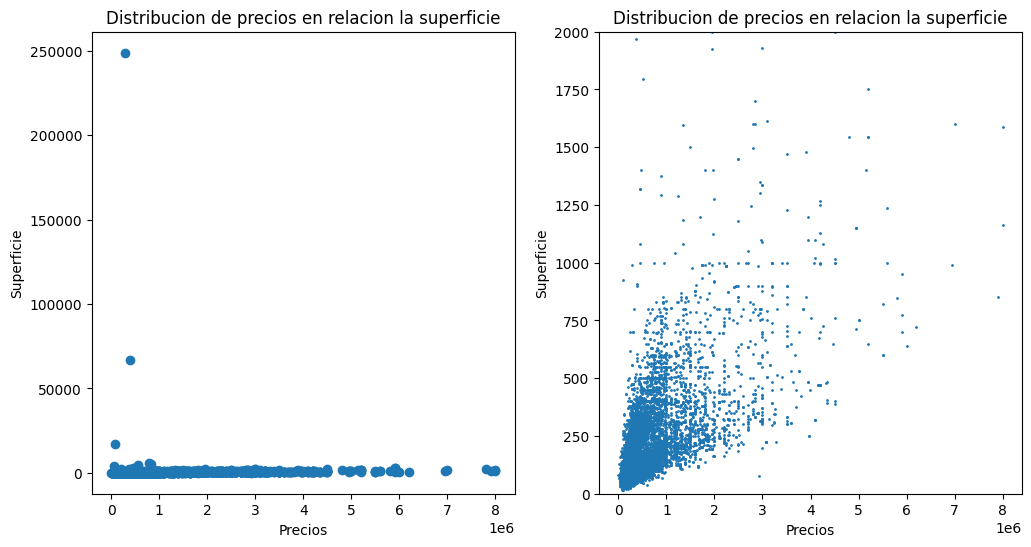

In [51]:
# Se gerena un grid de 1x2 para el plot
fig, axs= plt.subplots(1, 2, figsize=(12, 6))

#Se grafica un scatterplot que relaciona precio(x) y superficie(y)
axs[0].scatter(x=ds_filtrado['price'], y=ds_filtrado['surface'])
# Titulo y etiquetas
axs[0].set_title('Distribucion de precios en relacion la superficie')
axs[0].set_xlabel('Precios')
axs[0].set_ylabel('Superficie')

#Segundo scatterplot que relaciona precio(x) y superficie(y) ampliando la zona mas densa
axs[1].scatter(x=ds_filtrado['price'], y=ds_filtrado['surface'], s=1)
# Titulo y etiquetas
axs[1].set_title('Distribucion de precios en relacion la superficie')
axs[1].set_xlabel('Precios')
axs[1].set_ylabel('Superficie')
# Se limita el eje y a un maximo de 2000 m²
axs[1].set_ylim(0, 2000)


### Se han graficado dos versiones de los datos.

-El primer gráfico muestra los datos en bruto y se puede observar que hay unas pocas propiedades que exceden por mucho los valores medios, llegando a tener una superficie de casi 250000 M² y precios en torno a 8.000.000 de euros.


-En el segundo gráfico se han filtrado los valores de superficie por encima de los 2000 M2. Se aprecia la mayor densidad de datos. Se puede intuir, de manera poco precisa, que la mayor parte de las propiedades estan por debajo de los 1000 m² y los 300.000 euros.


#### Ejercicio 12. ¿Cuántas agencia de bienes raíces contiene el dataset? (★★☆)

Imprime el valor obtenido.

In [52]:
# Se obtiene mediante nunique cuantos valores unicos contiene la columna 'realEstate_name'
inmobiliarias_totales = ds_filtrado['realEstate_name'].nunique()
# Se muestra el resultado
print(f"El número de inmobiliarias únicas en el DataFrame es: {inmobiliarias_totales}")

El número de inmobiliarias únicas en el DataFrame es: 1816


#### Ejercicio 13. ¿Cuál es la población (columna level5) que contiene la mayor cantidad de casas?(★★☆)

Imprima la población y el número de casas.

In [63]:
# Contamos las propiedades de cada poblacion
conteo_comunidad_max_props = ds_filtrado['level5'].value_counts()
#buscamos el maximo de propiedades en venta de la serie obtenida antes
max_props = conteo_comunidad_max_props.max()
# Obtenemos el indice con mas propiedades en venta de esa misma serie
comunidad_max_props = conteo_comunidad_max_props.idxmax()
# Mostramos resultado
print(f"La comunidad con más casas en venta es: {comunidad_max_props} con {max_props} casas.")


La comunidad con más casas en venta es:  Madrid Capital con 6632 casas.


#### Ejercicio 14. Ahora vamos a trabajar con el "cinturón sur" de Madrid. Has un subconjunto del Dataframe original que contenga las siguientes poblaciones (columna level5): "Fuenlabrada","Leganés","Getafe","Alcorcón" (★★☆)

Pista: Filtra el Dataframe original usando la columna `level5` y la función `isin`

In [54]:
# lista define las poblaciones del subset
lista_sub_ds = ["Fuenlabrada","Leganés","Getafe","Alcorcón"]
# creamos el dataframe con los valores de 'level5'=poblacion que pertenezcan a la lista lista_sub_ds
ds_comunidades_filtradas = ds_filtrado[ds_filtrado['level5'].isin(lista_sub_ds)]
# mostramos el vodigo
display(ds_comunidades_filtradas.head(2))

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,description,address,country,level1,level2,level3,level4,level5,level6,level7,level8,upperLevel,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone,PPS
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,2019-12-28T18:27:15.9975027Z,"""""Agencia inmobiliaria de FUENLABRADA - zona F...","Calle Polvoranca, 6, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,2019-12-28T18:27:15.9975027Z,Agencia inmobiliaria de FUENLABRADA - zona Fue...,"Barrio San Andres, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN,1034.883721


#### Ejercicio 15. Traza un gráfico de barra de la media de los precios y explica lo que observas (debes usar el subconjunto obtenido de la pregunta 14) (★★★)

Imprima un gráfico de barra de la media de precios y escriba en la celda Markdown un breve análisis del sector.

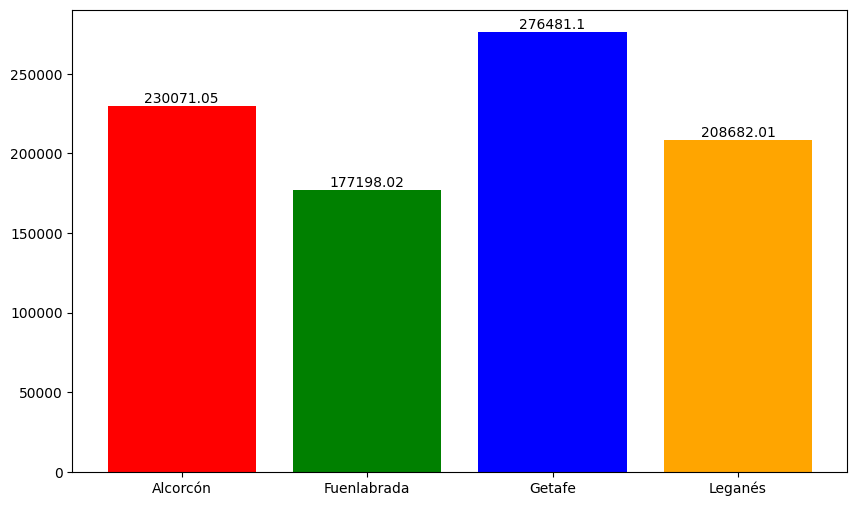

In [55]:
#hallamos precios medios de las propiedades agrupadas por poblaciones y redondeados a dos decimales
precios_medios = round(ds_comunidades_filtradas.groupby('level5')['price'].mean(), 2)

#Se procede con el grafico de Barras

#definimos los colores a usar
colors = ['red', 'green', 'blue', 'orange']
#definimos el tamaño del plot
plt.figure(figsize=(10,6))
#Plot de las barras // almacenamos el plot en una variable 
barras = plt.bar(precios_medios.index, precios_medios.values, color=colors)
#bucle para sobreescribir el valor numerico de precio medio sobre cada barra // de ahi el definir la variables barras
for barra in barras:
    #variable yval toma el valor maximo de cada barra = precio medio
    yval = barra.get_height()
    #Posicionamos el texto en el x e y de cada barra con el texto = yval de cada barra
    plt.text(barra.get_x() + barra.get_width()/2, yval+1, yval,  ha='center', va='bottom')

plt.show()


### Observaciones:

-La población con el precio medio mas alto de la propiedades es Getafe seguida de Alcorcón, Leganés y, en ultimo lugar, Fuenlabrada, donde es mas barato, en promedio, comprar una propiedad.

#### Ejercicio 16. Calcula la media y la varianza dela muestra para las siguientes variables: precio, habitaciones, superficie y baños (debes usar el subconjunto obtenido en la pregunta 14) (★★★)

Imprime ambos valores por  cada variable.

In [56]:
#calcular varianza y media para 'price', 'rooms', 'surface' y 'bathrooms'

#defino una funcion para extender el proceso a cualquier columna (numerica) de cualquier dataframe
def stats(dataset, columns):
    #se define el dicionario results donde se almacenaran los resultados var y mean
    results = {}
    #bucle for que itera sobre cada columna del Dataframe
    for column in columns:
        mean = dataset[column].mean()
        var = dataset[column].var()
        #Se almacenan lo resultados en el diccionario results con [column] como clave y (mean, var) como tupla de resultados
        results[column] = (mean, var)
        #se imprime la fString con los resxultados al llamado de la funcion
        print(f"{column} - Media: {mean}, Varianza: {var}")

#podriamos definir otras columnas y dataframes// la lista columnas define las que solicitaba el ejercicio
columnas = ['price', 'surface', 'bathrooms', 'rooms']

#llamada a la funcion con parametros (nuestro_dataframe, nuestra_lista_columnas)
stats(ds_comunidades_filtradas, columnas)

price - Media: 226085.69162011173, Varianza: 14444627877.728062
surface - Media: 111.29806451612903, Varianza: 4275.920086688338
bathrooms - Media: 1.6271186440677967, Varianza: 0.5757343354551729
rooms - Media: 3.0235955056179775, Varianza: 0.7204774964927139


#### Exercise 17. What is the most expensive house of each population? You must use the subset obtained in the question 14 (★★☆)

Print both the address and the price of the selected house of each population. You can print a DataFrame or a single line for each population

In [57]:
import pandas
# Encontrar los índices de las casas más caras en cada población
indice_precios_max = ds_comunidades_filtradas.groupby('level5')['price'].idxmax()

# Seleccionar las filas correspondientes a esos índices y extraer los valores requeridos 
casas_mas_caras = ds_comunidades_filtradas.loc[indice_precios_max, ['address', 'price']]

# Imprimir el DataFrame resultante
display(casas_mas_caras)



,address,price
5585,Alcorcón,950000
11561,"Calle de Paulo Freire, 5, Fuenlabrada",490000
2881,Getafe,1050000
10412,"Avenida Reina Sofía, Leganés",650000


#### Exercise 18. Normalize the variable of prices for each population and plot the 4 histograms in the same plot (you must use the subset obtained in the question 14) (★★★)

For the normalization method you can use the one you consider to, there is not a single correct answer to this question. Print the plot and write in the Markdown cell a brief analysis about the plot

Hint: You can help yourself reviewing the multihist demo of Matplotlib

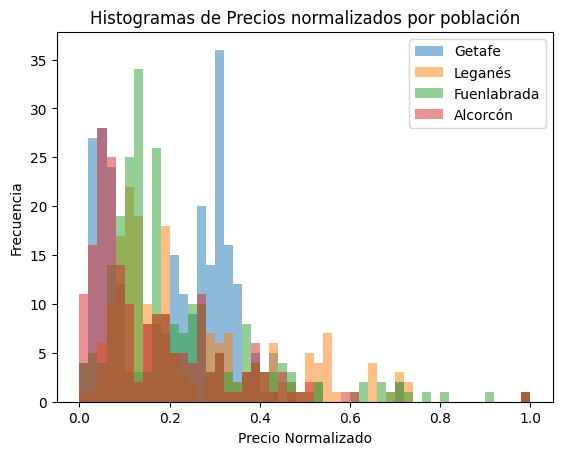

In [58]:
# normalizacion a distribucion 0-1 "Fuenlabrada","Leganés","Getafe","Alcorcón"

# defino dataframes para cada poblacion a normalizar
ds_getafe = ds_comunidades_filtradas[ds_comunidades_filtradas['level5'] == 'Getafe'].copy()
ds_leganes = ds_comunidades_filtradas[ds_comunidades_filtradas['level5'] == 'Leganés'].copy()
ds_fuenlabrada = ds_comunidades_filtradas[ds_comunidades_filtradas['level5'] == 'Fuenlabrada'].copy()
ds_alcorcon = ds_comunidades_filtradas[ds_comunidades_filtradas['level5'] == 'Alcorcón'].copy()

# creamos nueva columna norm_price (precio normalizado de 0 a 1 para cada poblacion, con la formula (x- x.max)/(x.max - x.min))
ds_getafe['norm_price'] = (ds_getafe['price']- ds_getafe['price'].min())/(ds_getafe['price'].max() - ds_getafe['price'].min())
ds_leganes['norm_price'] = (ds_leganes['price']- ds_leganes['price'].min())/(ds_leganes['price'].max() - ds_leganes['price'].min())
ds_fuenlabrada['norm_price'] = (ds_fuenlabrada['price']- ds_fuenlabrada['price'].min())/(ds_fuenlabrada['price'].max() - ds_fuenlabrada['price'].min())
ds_alcorcon['norm_price'] = (ds_alcorcon['price']- ds_alcorcon['price'].min())/(ds_alcorcon['price'].max() - ds_alcorcon['price'].min())

# Plot de los histogramas, uno sobre otro, ajustada transparencia al 50% 
plt.hist(ds_getafe['norm_price'], bins=50, alpha=0.5, label='Getafe')
plt.hist(ds_leganes['norm_price'], bins=50, alpha=0.5, label='Leganés')
plt.hist(ds_fuenlabrada['norm_price'], bins=50, alpha=0.5, label='Fuenlabrada')
plt.hist(ds_alcorcon['norm_price'], bins=50, alpha=0.5, label='Alcorcón')
plt.legend(loc='upper right')
plt.title('Histogramas de Precios normalizados por población')
plt.xlabel('Precio Normalizado')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

**TODO: Markdown**. To write here, double click to this cell and just remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 19. What can you say about the price per square meter (price/m2) between the towns of "Getafe" and "Alcorcón"? You must use the subset obtained in the question 14 (★★☆)

Hint: Create a new column called `pps` (price per square) and then analyse the values

In [59]:
#hallamos precios medios por metro cuadrado para Getafe y Alcorcón
pps_medio_getafe = ds_getafe['PPS'].mean()
pps_medio_alcorcon = ds_alcorcon['PPS'].mean()

#imprimimos resultados redondeados a dos decimales
print(f'El precio medio por metro cuadrado en Getafe es de {pps_medio_getafe: .2f} euros mientras que en Alcorcón es de {pps_medio_alcorcon: .2f} euros')


El precio medio por metro cuadrado en Getafe es de  2174.59 euros mientras que en Alcorcón es de  2239.30 euros


#### Exercise 20. Make the same plot for 4 different populations (level5 column) and rearrange them on the same graph? You must use the subset obtained in the question 14 (★★☆) 
Hint: make a scatter plot of each population using subplots.

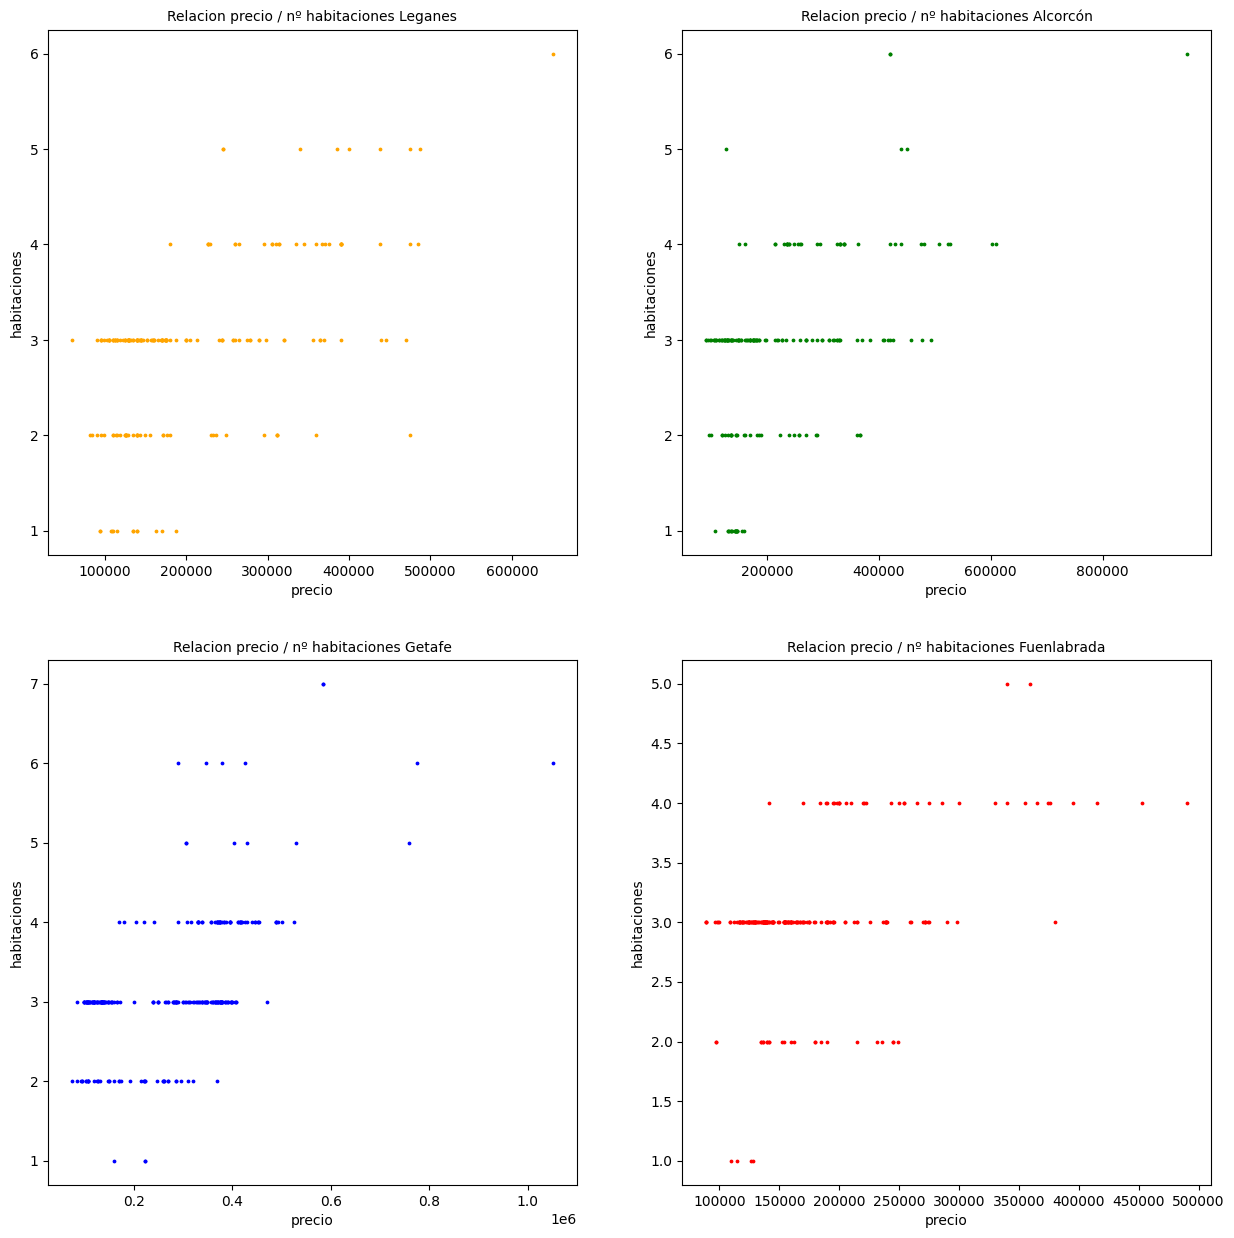

In [60]:
#Se van a trazar scatterplots de la relacion entre dormitorios y precio de las viviendas

#definimos un grid 2x2 para los plots
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

#Scatter plot leganes // relacion entre precio y habitaciones de la propiedad
axs[0,0].scatter(ds_leganes['price'], ds_leganes['rooms'],color='orange', s=3 )
axs[0,0].set_title('Relacion precio / nº habitaciones Leganes', fontsize=10)
axs[0,0].set_xlabel('precio')
axs[0,0].set_ylabel('habitaciones')

#Scatter plot Alcorcon // relacion entre precio y habitaciones de la propiedad
axs[0,1].scatter(ds_alcorcon['price'], ds_alcorcon['rooms'],color='green', s=3)
axs[0,1].set_title('Relacion precio / nº habitaciones Alcorcón', fontsize=10)
axs[0,1].set_xlabel('precio')
axs[0,1].set_ylabel('habitaciones')

#Scatter plot Getafe // relacion entre precio y habitaciones de la propiedad
axs[1,0].scatter(ds_getafe['price'], ds_getafe['rooms'],color='blue', s=3)
axs[1,0].set_title('Relacion precio / nº habitaciones Getafe', fontsize=10)
axs[1,0].set_xlabel('precio')
axs[1,0].set_ylabel('habitaciones')

#Scatter plot Fuenlabrada // relacion entre precio y habitaciones de la propiedad
axs[1,1].scatter(ds_fuenlabrada['price'], ds_fuenlabrada['rooms'],color='red',  s=3)
axs[1,1].set_title('Relacion precio / nº habitaciones Fuenlabrada', fontsize=10)
axs[1,1].set_xlabel('precio')
axs[1,1].set_ylabel('habitaciones')

plt.show()



#### Ejercicio 21. Realiza un trazado de las coordenadas (columnas latitud y longitud) del cinturón ur de Madrid por color d cada población (debes usar el subconjunto obtenido en la pregunta 14) (★★★★)

Ejecuta la siguiente celda y luego comienza a codear en la siguiente. Debes implementar u código simple que transforme las columnas de coordenadas en un diccionario de python (agrega más información si es necesario) y agrégala al mapa.

In [61]:
from ipyleaflet import Map, Marker, basemaps, LayerGroup, AwesomeIcon, LayersControl

#elimino posibles NaN
ds_no_Nan = ds_comunidades_filtradas.dropna(subset=['latitude', 'longitude'])


# Crear el mapa, centrado en Madrid.
mapa = Map(center=(40.35, -3.83), zoom=12, basemap=basemaps.OpenStreetMap.Mapnik)

#Crear diccionario 
diccionario_coord = ds_no_Nan.groupby('level5').apply(lambda x: list(zip(x.latitude, x.longitude)),include_groups=False).to_dict()

#corregir diccionario cambiando ',' por '.'
diccionario_corregido = {}
for poblacion, coords in diccionario_coord.items():
    coords_corregidas = [(float(lat.replace(',', '.')), float(lon.replace(',', '.'))) for lat, lon in coords if lat != '0' and lon != '0']
    diccionario_corregido[poblacion] = coords_corregidas

#se crea lista de colores para asignar a las poblaciones   
colores = ['red', 'purple', 'green', 'lightblue']
for i ,(poblacion, coords) in enumerate(diccionario_corregido.items()):
    # Crear un grupo de capas para cada población
    layer = LayerGroup(name=poblacion)
    for lat, lon in coords:
        # Verificar que las coordenadas no sean (0.0, 0.0) antes de añadir el marcador
        if (lat, lon) != (0.0, 0.0):
            #se define el tipo de marker // el color itera sobre la lista colores
            icon = AwesomeIcon(marker_color=colores[i % len(colores)], icon_color='white',spin=False)
            #se define el marker con las coordenadas iteradas y especificando que no se puede mover de su posicion
            marker = Marker(location=(lat, lon), icon=icon, draggable=False)
            layer.add_layer(marker)
    mapa.add_layer(layer)
#se añade control de capas para poder activar o desactivar la vicualizacion por poblaciones
mapa.add_control(LayersControl())
mapa


Map(center=[40.35, -3.83], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…